<a href="https://colab.research.google.com/github/nihar-max/ted_talk_views_prediction/blob/master/TEDX_Talk_Views_Prediction_Part_3_Modelling.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import  seaborn as sns

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


# 1.1 Loading Data

In [3]:
#Using Pandas library to load dataset
X_train = pd.read_csv('/content/drive/MyDrive/TED_Talk_views_prediction/Final_data/X_train.csv',
                  engine="python",
                  error_bad_lines=False,
                  encoding='utf-8')


X_test = pd.read_csv('/content/drive/MyDrive/TED_Talk_views_prediction/Final_data/X_test.csv',
                  engine="python",
                  error_bad_lines=False,
                  encoding='utf-8')


y_train = pd.read_csv('/content/drive/MyDrive/TED_Talk_views_prediction/Final_data/y_train.csv',
                  engine="python",
                  error_bad_lines=False,
                  encoding='utf-8')


y_test = pd.read_csv('/content/drive/MyDrive/TED_Talk_views_prediction/Final_data/y_test.csv',
                  engine="python",
                  error_bad_lines=False,
                  encoding='utf-8')


<ipython-input-3-9c04da9afbbd>:2: FutureWarning: The error_bad_lines argument has been deprecated and will be removed in a future version. Use on_bad_lines in the future.


  X_train = pd.read_csv('/content/drive/MyDrive/TED_Talk_views_prediction/Final_data/X_train.csv',
<ipython-input-3-9c04da9afbbd>:8: FutureWarning: The error_bad_lines argument has been deprecated and will be removed in a future version. Use on_bad_lines in the future.


  X_test = pd.read_csv('/content/drive/MyDrive/TED_Talk_views_prediction/Final_data/X_test.csv',
<ipython-input-3-9c04da9afbbd>:14: FutureWarning: The error_bad_lines argument has been deprecated and will be removed in a future version. Use on_bad_lines in the future.


  y_train = pd.read_csv('/content/drive/MyDrive/TED_Talk_views_prediction/Final_data/y_train.csv',
<ipython-input-3-9c04da9afbbd>:20: FutureWarning: The error_bad_lines argument has been deprecated and will be removed in a future version. Use on_bad_lines in the future.


  y_test = 

In [4]:
X_train.drop('Unnamed: 0', axis=1, inplace=True)
y_train.drop('Unnamed: 0', axis=1, inplace=True)
X_test.drop('Unnamed: 0', axis=1, inplace=True)
y_test.drop('Unnamed: 0', axis=1, inplace=True)

In [5]:
print(' Total datapoints in X_train :',X_train.shape)
print(' Total datapoints in X_test :',X_test.shape)
print(' Total datapoints in y_train :',y_train.shape)
print(' Total datapoints in y_test :',y_test.shape)

 Total datapoints in X_train : (3003, 21)
 Total datapoints in X_test : (1002, 21)
 Total datapoints in y_train : (3003, 1)
 Total datapoints in y_test : (1002, 1)


## 2.0 Feature Transformation
- Standardization

### 2.1 Standardization

In [6]:

#### standarisation: We use the Standardscaler from sklearn library
from sklearn.preprocessing import StandardScaler

In [7]:
scaler=StandardScaler()
X_train_scaled= pd.DataFrame(scaler.fit_transform(X_train),columns = X_train.columns)

In [8]:
X_test_scaled= pd.DataFrame(scaler.transform(X_test),columns = X_test.columns)

In [9]:
X_train_scaled.head()

,related_talks_avg_views,Speaker1_avg_views,Event_avg_views,published_year,comments_mean,comments_end_distribution,duration_in_min,count_available_lang,Age_of_Video,published_day_Monday,...,published_day_Sunday,published_day_Thursday,published_day_Tuesday,published_day_Wednesday,native_lang_en,native_lang_es,published_month_3,published_month_5,published_month_10,published_month_11
0,0.110559,3.014317,0.235315,-0.658720,-0.120804,-0.418748,-0.420534,0.987236,0.658720,-0.459224,...,-0.11169,-0.511111,1.880493,-0.458693,0.110152,-0.079795,-0.339283,-0.292046,-0.304622,-0.285959
1,1.686970,1.230099,0.453697,0.095239,-0.187480,-0.461940,-0.585852,1.099914,-0.095239,-0.459224,...,-0.11169,-0.511111,1.880493,-0.458693,0.110152,-0.079795,-0.339283,-0.292046,-0.304622,-0.285959
2,-0.040194,-0.614796,-0.322067,1.351837,-0.587537,-0.721089,-0.916489,-0.252221,-1.351837,-0.459224,...,-0.11169,-0.511111,1.880493,-0.458693,0.110152,-0.079795,-0.339283,-0.292046,-0.304622,-0.285959
3,0.868754,1.966164,1.151991,-0.407401,1.063677,0.348537,0.902010,0.761880,0.407401,-0.459224,...,-0.11169,-0.511111,-0.531775,2.180109,0.110152,-0.079795,-0.339283,-0.292046,3.282754,-0.285959
4,-0.416965,-0.019236,0.871605,-0.407401,2.785490,1.463896,0.736692,-0.026866,0.407401,2.177584,...,-0.11169,-0.511111,-0.531775,-0.458693,0.110152,-0.079795,-0.339283,-0.292046,-0.304622,3.497009


In [10]:
X_test_scaled.head()

,related_talks_avg_views,Speaker1_avg_views,Event_avg_views,published_year,comments_mean,comments_end_distribution,duration_in_min,count_available_lang,Age_of_Video,published_day_Monday,...,published_day_Sunday,published_day_Thursday,published_day_Tuesday,published_day_Wednesday,native_lang_en,native_lang_es,published_month_3,published_month_5,published_month_10,published_month_11
0,-0.358543,-0.228955,0.833563,-2.166638,-0.163948,-0.446696,1.397964,-0.026866,2.166638,-0.459224,...,-0.11169,-0.511111,-0.531775,2.180109,0.110152,-0.079795,-0.339283,-0.292046,-0.304622,-0.285959
1,-0.433260,-0.237244,-0.248633,1.100517,-0.564004,-0.705845,-0.751171,-1.379001,-1.100517,-0.459224,...,-0.11169,-0.511111,-0.531775,-0.458693,0.110152,-0.079795,-0.339283,-0.292046,-0.304622,-0.285959
2,0.009500,0.455346,-0.058778,1.100517,-0.003152,1.706566,-1.081807,-0.026866,-1.100517,-0.459224,...,-0.11169,1.956521,-0.531775,-0.458693,0.110152,-0.079795,-0.339283,-0.292046,-0.304622,-0.285959
3,-0.683177,-0.161425,-0.552963,-0.407401,0.338084,-0.121488,0.240738,0.311168,0.407401,-0.459224,...,-0.11169,-0.511111,1.880493,-0.458693,0.110152,-0.079795,-0.339283,-0.292046,-0.304622,-0.285959
4,-0.160673,0.253686,0.495235,-0.156081,3.499317,1.926300,1.397964,0.085812,0.156081,-0.459224,...,-0.11169,-0.511111,1.880493,-0.458693,0.110152,-0.079795,-0.339283,-0.292046,-0.304622,-0.285959


In [11]:
feat=X_train.columns
feat

Index(['related_talks_avg_views', 'Speaker1_avg_views', 'Event_avg_views',
       'published_year', 'comments_mean', 'comments_end_distribution',
       'duration_in_min', 'count_available_lang', 'Age_of_Video',
       'published_day_Monday', 'published_day_Saturday',
       'published_day_Sunday', 'published_day_Thursday',
       'published_day_Tuesday', 'published_day_Wednesday', 'native_lang_en',
       'native_lang_es', 'published_month_3', 'published_month_5',
       'published_month_10', 'published_month_11'],
      dtype='object')

In [12]:
X_train = X_train_scaled
X_test = X_test_scaled

In [13]:
np.mean(y_train['views'])

2135689.8754578754

# 2. Load Machine Learning Model

In [14]:
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.neighbors import KNeighborsRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor,AdaBoostRegressor
from sklearn.svm import SVR
from sklearn.linear_model import LinearRegression, Ridge,Lasso
from sklearn.metrics import r2_score, mean_absolute_error, mean_squared_error
from sklearn.model_selection import RandomizedSearchCV
from xgboost import XGBRegressor
from time import time

from sklearn.linear_model import LinearRegression, Ridge,Lasso
from sklearn.neighbors import KNeighborsRegressor
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.ensemble import ExtraTreesRegressor, RandomForestRegressor
from sklearn.tree import DecisionTreeRegressor

In [15]:
def evaluate_model(true, predicted):
    mae = mean_absolute_error(true, predicted)
    rmse = np.sqrt(mean_squared_error(true, predicted))
    r2_square = r2_score(true, predicted)
    return mae, rmse, r2_square

In [16]:
avg_op = np.mean(y_train['views'])
mae = 559706.9915

print(mae*100/avg_op)
print(avg_op)

26.207315862280947
2135689.8754578754


In [60]:
models = {
    "LinearReg": LinearRegression(),
    "Lasso": Lasso(),
    "Ridge": Ridge()
}
model_list = []
r2_list =[]

for i in range(len(list(models))):
    start = time()
    model = list(models.values())[i]
    model.fit(X_train, y_train) # Train model
    train_time = time() - start
    start = time()
    predict_time = time()-start


    # Make predictions
    y_train_pred = model.predict(X_train)
    y_test_pred = model.predict(X_test)

    # Evaluate Train and Test dataset
    model_train_mae , model_train_rmse, model_train_r2 = evaluate_model(y_train, y_train_pred)

    model_test_mae , model_test_rmse, model_test_r2 = evaluate_model(y_test, y_test_pred)



    print(list(models.keys())[i])
    model_list.append(list(models.keys())[i])

    print('Model performance for Training set')
    print("\tTraining time: %0.3fs" % train_time)
    MAE_per = model_train_mae*100/(np.mean(y_train['views']))
    RMSE_per = model_train_rmse*100/(np.mean(y_train['views']))
    print("- Mean Absolute Error is: {:.4f}".format(model_train_mae), 'which is {:.2f}'.format((MAE_per)),'% of target mean')
    print("- R2 Score: {:.4f}".format(model_train_r2))
    print("")


    print('----------------------------------')

    print('Model performance for Test set')
    print("\tPrediction time: %0.3fs" % predict_time)
    MAE_test_per = model_test_mae*100/(np.mean(y_test['views']))
    RMSE_test_per = model_test_rmse/(np.mean(y_test['views']))
    print("- Mean Absolute Error: {:.4f}".format(model_test_mae),'which is {:.2f}'.format((MAE_test_per)),'% of target mean')
    print("- R2 Score: {:.4f}".format(model_test_r2))
    r2_list.append(model_test_r2)

    print('='*35)
    print('\n')

LinearReg
Model performance for Training set
	Training time: 0.036s
- Mean Absolute Error is: 559706.9915 which is 26.21 % of target mean
- R2 Score: 0.7900

----------------------------------
Model performance for Test set
	Prediction time: 0.000s
- Mean Absolute Error: 531943.1872 which is 24.35 % of target mean
- R2 Score: 0.8482


Lasso
Model performance for Training set
	Training time: 0.032s
- Mean Absolute Error is: 559706.1334 which is 26.21 % of target mean
- R2 Score: 0.7900

----------------------------------
Model performance for Test set
	Prediction time: 0.000s
- Mean Absolute Error: 531942.3055 which is 24.35 % of target mean
- R2 Score: 0.8482


Ridge
Model performance for Training set
	Training time: 0.017s
- Mean Absolute Error is: 559809.6686 which is 26.21 % of target mean
- R2 Score: 0.7900

----------------------------------
Model performance for Test set
	Prediction time: 0.000s
- Mean Absolute Error: 532081.3374 which is 24.35 % of target mean
- R2 Score: 0.8482

In [61]:
pd.DataFrame(list(zip(model_list, r2_list)), columns=['Model Name', 'R2_Score']).sort_values(by=["R2_Score"],ascending=False)

,Model Name,R2_Score
2,Ridge,0.848206
0,LinearReg,0.848178
1,Lasso,0.848178


In [39]:
from sklearn.model_selection import RandomizedSearchCV # RandomisedsearchCV #
from sklearn.model_selection import ShuffleSplit
from sklearn.ensemble import RandomForestRegressor
parameters = {
    'n_estimators': [50,100,300,400],
    "bootstrap": [True, False],
    "max_features"      : ["auto", "sqrt"],
    'max_depth': [20,25,50,75,100]

}
regr = RandomForestRegressor(random_state=0)

rf = RandomizedSearchCV(regr, parameters)
rf.fit(X_train, y_train)

/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_validation.py:686: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_forest.py:413: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(
/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_validation.py:686: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_forest.py:413: FutureWa

RandomizedSearchCV(estimator=RandomForestRegressor(random_state=0),
                   param_distributions={'bootstrap': [True, False],
                                        'max_depth': [20, 25, 50, 75, 100],
                                        'max_features': ['auto', 'sqrt'],
                                        'n_estimators': [50, 100, 300, 400]})

In [40]:

print('Model performance for Training set')
y_pred_train = rf.predict(X_train)
mae = mean_absolute_error(y_train, y_pred_train)
r2_scores = r2_score(y_train, y_pred_train)
MAE_per = mae*100/(np.mean(y_train['views']))
#RMSE_per = model_train_rmse*100/np.sqrt((np.mean(y_train['views'])))
print("- Mean Absolute Error is: {:.4f}".format(mae), 'which is {:.2f}'.format((MAE_per)),'% of target mean')
print("- R2 Score: {:.4f}".format(r2_scores))
print("")


print('----------------------------------')

print('Model performance for Test set')
y_pred = rf.predict(X_test)
mae_test = mean_absolute_error(y_test, y_pred)
r2_score_test = r2_score(y_test, y_pred)
MAE_test_per = model_test_mae*100/(np.mean(y_test['views']))
# RMSE_test_per = model_test_rmse/(np.mean(y_test['views']))
print("- Mean Absolute Error: {:.4f}".format(mae_test),'which is {:.2f}'.format((MAE_test_per)),'% of target mean')
print("- R2 Score: {:.4f}".format(r2_score_test))

Model performance for Training set
- Mean Absolute Error is: 187111.5032 which is 8.76 % of target mean
- R2 Score: 0.9584

----------------------------------
Model performance for Test set
- Mean Absolute Error: 458783.4850 which is 39.31 % of target mean
- R2 Score: 0.8167


In [27]:
from sklearn.model_selection import GridSearchCV
xgb1 = XGBRegressor()
parameters = {'nthread':[4], #when use hyperthread, xgboost may become slower
              'objective':['reg:linear'],
              'learning_rate': [.03, 0.05, .07], #so called `eta` value
              'max_depth': [5, 6, 7],
              'min_child_weight': [4],
              'silent': [1],
              'subsample': [0.7],
              'colsample_bytree': [0.7],
              'n_estimators': [500]}

xgb_grid = GridSearchCV(xgb1,
                        parameters,
                        cv = 2,
                        n_jobs = 5,
                        verbose=True)

xgb_grid.fit(X_train,y_train)

Fitting 2 folds for each of 120 candidates, totalling 240 fits
[16:50:57] WARNING: ../src/objective/regression_obj.cu:213: reg:linear is now deprecated in favor of reg:squarederror.
[16:50:57] WARNING: ../src/learner.cc:767: 
Parameters: { "silent" } are not used.



GridSearchCV(cv=2,
             estimator=XGBRegressor(base_score=None, booster=None,
                                    callbacks=None, colsample_bylevel=None,
                                    colsample_bynode=None,
                                    colsample_bytree=None,
                                    early_stopping_rounds=None,
                                    enable_categorical=False, eval_metric=None,
                                    feature_types=None, gamma=None, gpu_id=None,
                                    grow_policy=None, importance_type=None,
                                    interaction_constraints=None,
                                    learning_rate=None, m...
                                    monotone_constraints=None, n_estimators=100,
                                    n_jobs=None, num_parallel_tree=None,
                                    predictor=None, random_state=None, ...),
             n_jobs=5,
             param_grid={'colsample_bytree': [0.7],
                         'learning_rate': [0.03, 0.05, 0.07],
                         'max_depth': [5, 6, 7, 8, 9, 10, 12, 15],
                         'min_child_weight': [4],
                         'n_estimators': [50, 100, 300, 400, 500],
                         'nthread': [4], 'objective': ['reg:linear'],
                         'silent': [1], 'subsample': [0.7]},
             verbose=True)

In [28]:
print('Model performance for Training set')
y_pred_train = xgb_grid.predict(X_train)
mae = mean_absolute_error(y_train, y_pred_train)
r2_scores = r2_score(y_train, y_pred_train)
MAE_per = mae*100/(np.mean(y_train['views']))
#RMSE_per = model_train_rmse*100/np.sqrt((np.mean(y_train['views'])))
print("- Mean Absolute Error is: {:.4f}".format(mae), 'which is {:.2f}'.format((MAE_per)),'% of target mean')
print("- R2 Score: {:.4f}".format(r2_scores))
print("")


print('----------------------------------')

print('Model performance for Test set')
y_pred = xgb_grid.predict(X_test)
mae_test = mean_absolute_error(y_test, y_pred)
r2_score_test = r2_score(y_test, y_pred)
MAE_test_per = mae_test*100/(np.mean(y_test['views']))
# RMSE_test_per = model_test_rmse/(np.mean(y_test['views']))
print("- Mean Absolute Error: {:.4f}".format(mae_test),'which is {:.2f}'.format((MAE_test_per)),'% of target mean')
print("- R2 Score: {:.4f}".format(r2_score_test))

Model performance for Training set
- Mean Absolute Error is: 315650.9921 which is 14.78 % of target mean
- R2 Score: 0.9534

----------------------------------
Model performance for Test set
- Mean Absolute Error: 473377.6922 which is 21.67 % of target mean
- R2 Score: 0.8276


In [62]:
op1 = pd.DataFrame(list(zip(model_list, r2_list)), columns=['Model_Name', 'R2_Score']).sort_values(by=["R2_Score"],ascending=False)

op2 = {'Model_Name':['Random_Forest', 'XBBoost'], 'R2_Score':[0.8167,0.8276]}
op = pd.DataFrame(op2)


In [63]:
final_op = pd.concat([op1, op], axis=0)

In [64]:
final_op

,Model_Name,R2_Score
2,Ridge,0.848206
0,LinearReg,0.848178
1,Lasso,0.848178
0,Random_Forest,0.816700
1,XBBoost,0.827600


## Comparison of R2 Scores of Different Models on Unseen data (Dtest)

Text(0, 0.5, 'R2_score')

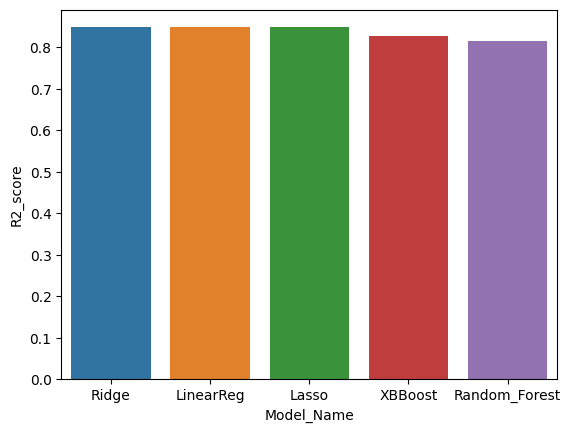

In [65]:
result = final_op.groupby('Model_Name')['R2_Score'].sum()
sns.barplot(x=result.index, y=result, order=result.sort_values(ascending = False).index)
plt.xlabel('Model_Name')
plt.ylabel('R2_score')

### Conclusion

- So after loading the data we started with EDA process to understand the data through visualizations and also handles outliers and NaN values.In feature engineering we have created some of the features as well as removed some unwanted features which added less value to data and then we have scaled the data because this is regression problem with StandardScaler.

### Machine Learning Models used
- Linear Regression
- Ridge
- Lasso
- Random Forest Regressor
- XGB Regressor

Finally we have compared all the models w.r.t.o their R2 scores and hence even simple models like linear & Ridge can perform better than ensemble models like Random Forest and XGB with this type of use cases.


###  THE END